In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

In [3]:
df = pd.read_csv(r"file_location")
df

,Company Name,Ticker Symbol,Country of Exchange,NAICS National Industry Name,Year,EPS,ROA,ROE,ESG_score,Env_score,Soc_score,Gov_score,ESG_Comb_score,MarketCap
0,Covestro AG,1COV,Germany,Plastics Material and Resin Manufacturing,2016,2.93,5.1,20.1,66.40,70.25,68.00,56.88,66.40,1.387610e+10
1,Covestro AG,1COV,Germany,Plastics Material and Resin Manufacturing,2017,4.17,7.7,20.4,68.66,68.28,74.58,59.31,68.66,2.089835e+10
2,Covestro AG,1COV,Germany,Plastics Material and Resin Manufacturing,2018,12.25,18.6,42.2,73.62,72.78,74.72,73.21,73.62,9.062689e+09
3,Covestro AG,1COV,Germany,Plastics Material and Resin Manufacturing,2019,10.74,16.3,34.2,74.58,69.59,71.77,88.15,74.58,8.503184e+09
4,Covestro AG,1COV,Germany,Plastics Material and Resin Manufacturing,2020,3.26,4.9,10.5,76.25,74.38,69.86,90.37,76.25,1.191101e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6291,Zurich Insurance Group AG,ZURN,Switzerland,Direct Property and Casualty Insurance Carriers,2019,24.28,0.9,13.1,89.93,90.84,91.69,86.64,79.96,6.138598e+10
6292,Zurich Insurance Group AG,ZURN,Switzerland,Direct Property and Casualty Insurance Carriers,2020,27.69,1.0,12.7,88.87,89.60,90.93,85.50,50.53,6.349212e+10
6293,Zurich Insurance Group AG,ZURN,Switzerland,Direct Property and Casualty Insurance Carriers,2021,25.56,0.9,10.5,89.19,86.31,87.95,97.03,76.17,6.604281e+10
6294,Zurich Insurance Group AG,ZURN,Switzerland,Direct Property and Casualty Insurance Carriers,2022,34.66,1.2,13.7,87.89,85.62,87.16,94.72,78.62,7.199106e+10


# Check Normality

### QQ-plot

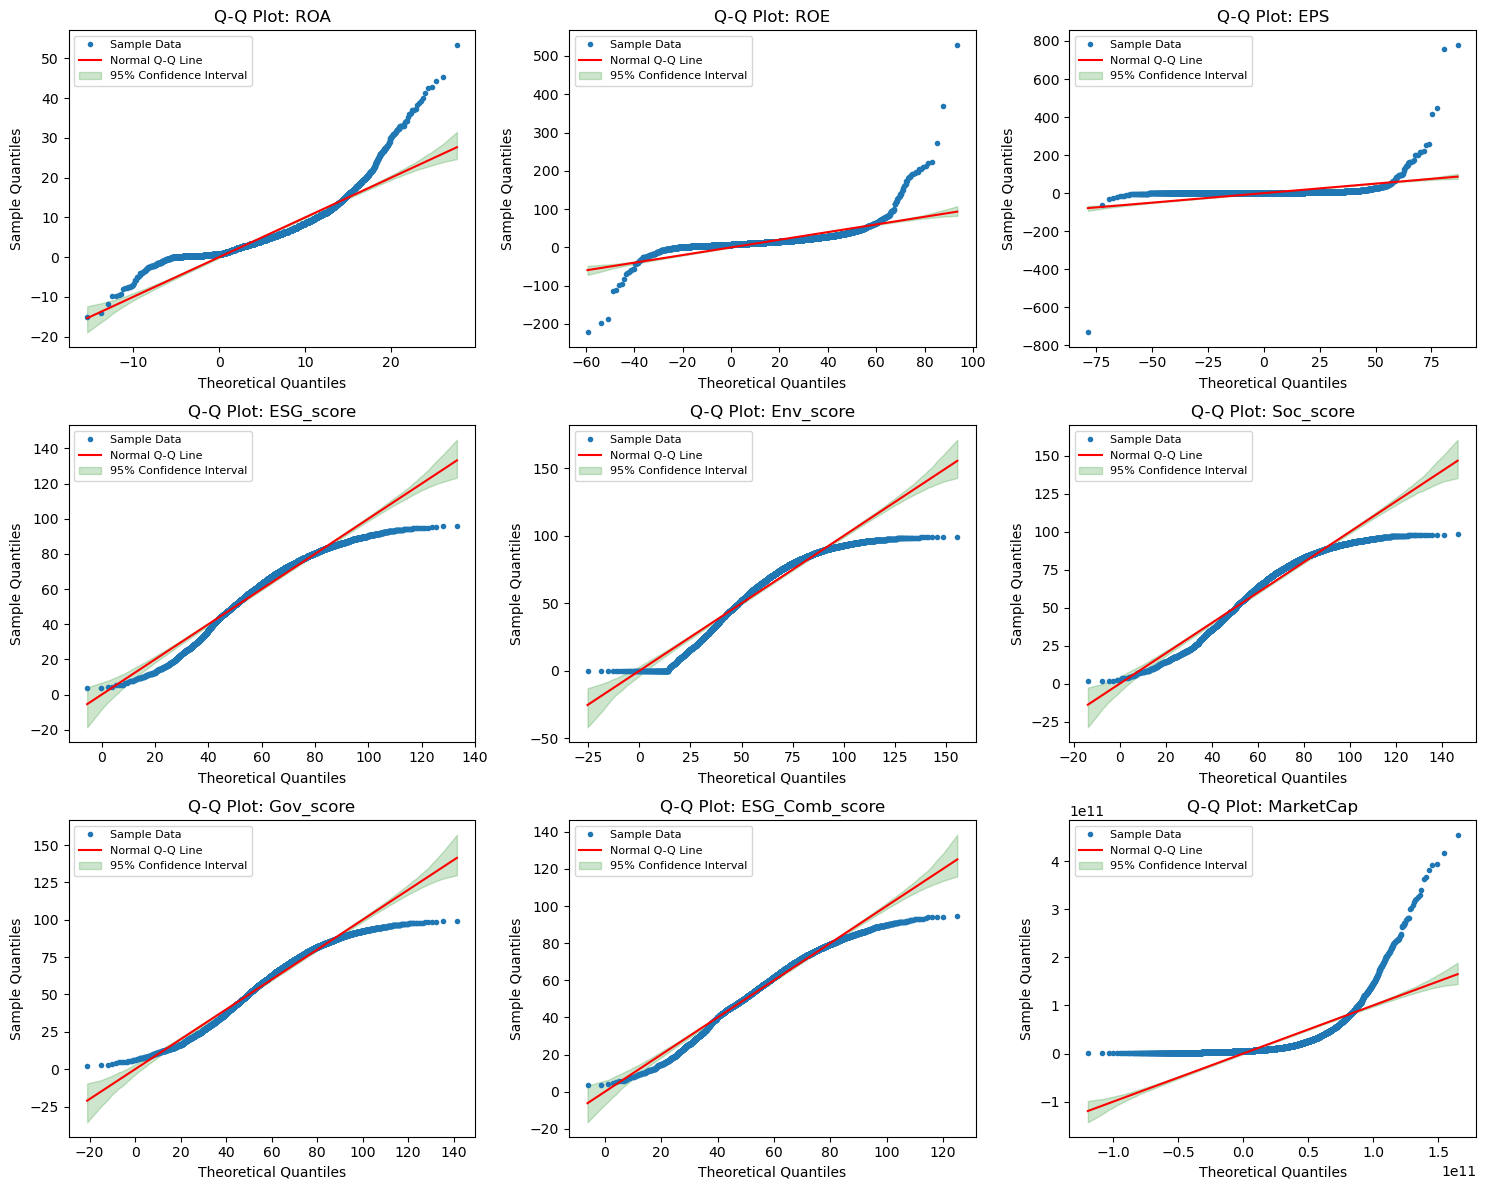

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# List of variables to check
variables = ['ROA', 'ROE', 'EPS', 'ESG_score', 'Env_score', 'Soc_score', 'Gov_score', 'ESG_Comb_score', 'MarketCap']

plt.figure(figsize=(15, 12))

for i, var in enumerate(variables, 1):
    data = df[var].dropna().values
    n = len(data)

    if n < 10:
        continue  # skip if not enough data

    # Sort sample
    sample_q = np.sort(data)
    mean = np.mean(data)
    std = np.std(data, ddof=1)

    # Theoretical quantiles
    probs = (np.arange(1, n + 1) - 0.5) / n
    theoretical_q = stats.norm.ppf(probs, loc=mean, scale=std)

    # Simulate confidence intervals
    n_sim = 1000
    sim_qs = np.zeros((n_sim, n))
    for j in range(n_sim):
        sim_data = np.random.normal(loc=mean, scale=std, size=n)
        sim_qs[j, :] = np.sort(sim_data)

    lower_bound = np.percentile(sim_qs, 2.5, axis=0)
    upper_bound = np.percentile(sim_qs, 97.5, axis=0)

    # Plot
    plt.subplot(3, 3, i)
    plt.plot(theoretical_q, sample_q, 'o', markersize=3, label='Sample Data')
    plt.plot(theoretical_q, theoretical_q, 'r-', label='Normal Q-Q Line')
    plt.fill_between(theoretical_q, lower_bound, upper_bound, color='green', alpha=0.2, label='95% Confidence Interval')

    plt.title(f"Q-Q Plot: {var}")
    plt.xlabel("Theoretical Quantiles")
    plt.ylabel("Sample Quantiles")
    plt.legend(fontsize=8)

plt.tight_layout()
plt.savefig("QQ-plots_with_curved_CI.png", dpi=300, bbox_inches="tight")
plt.show()



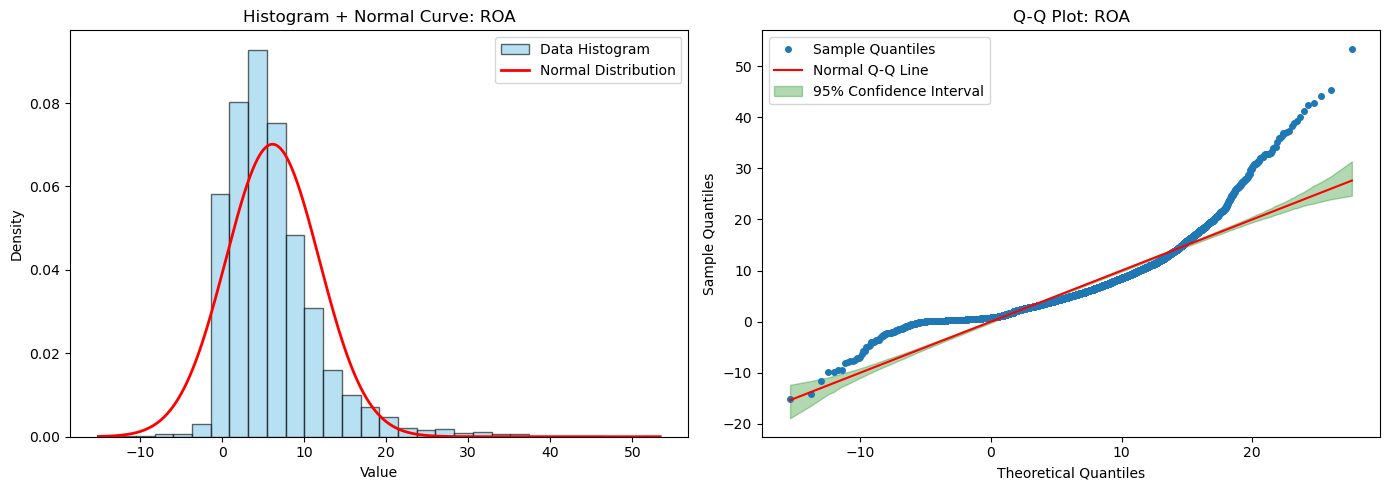

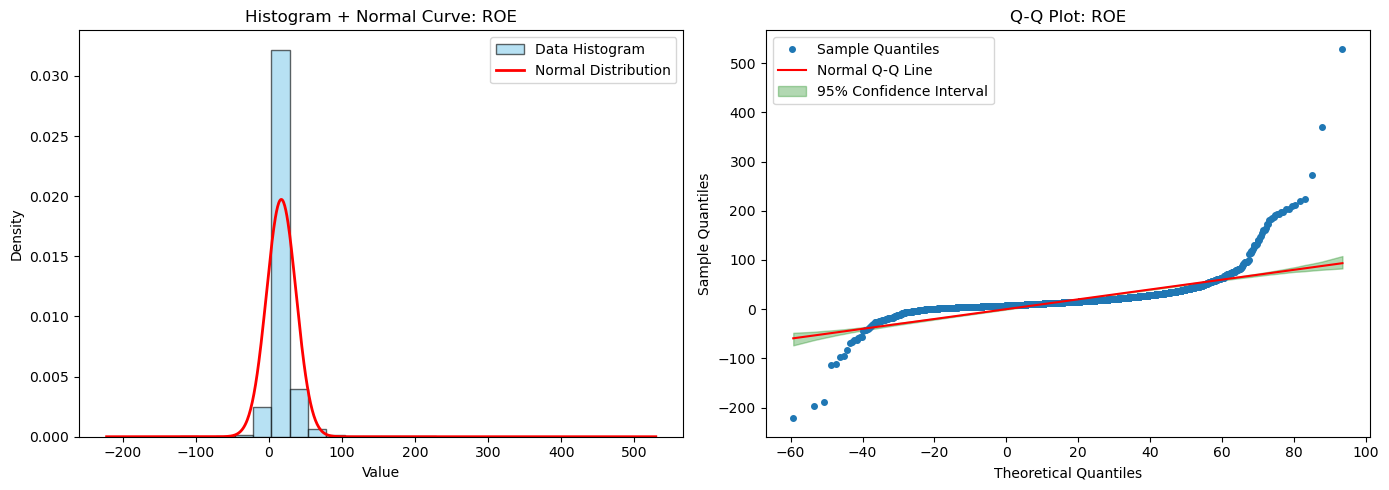

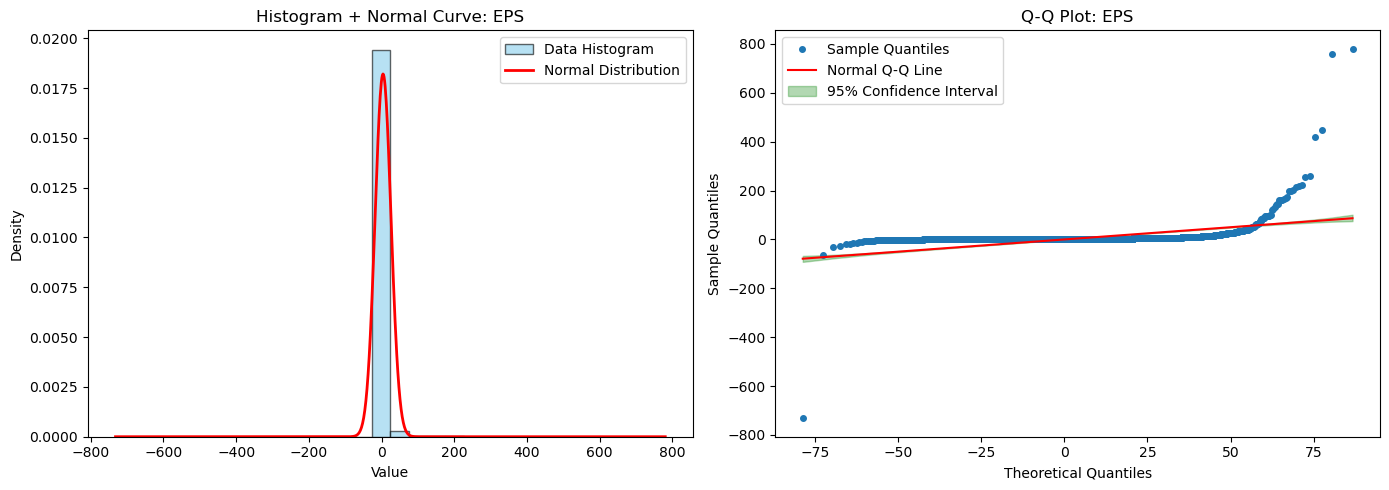

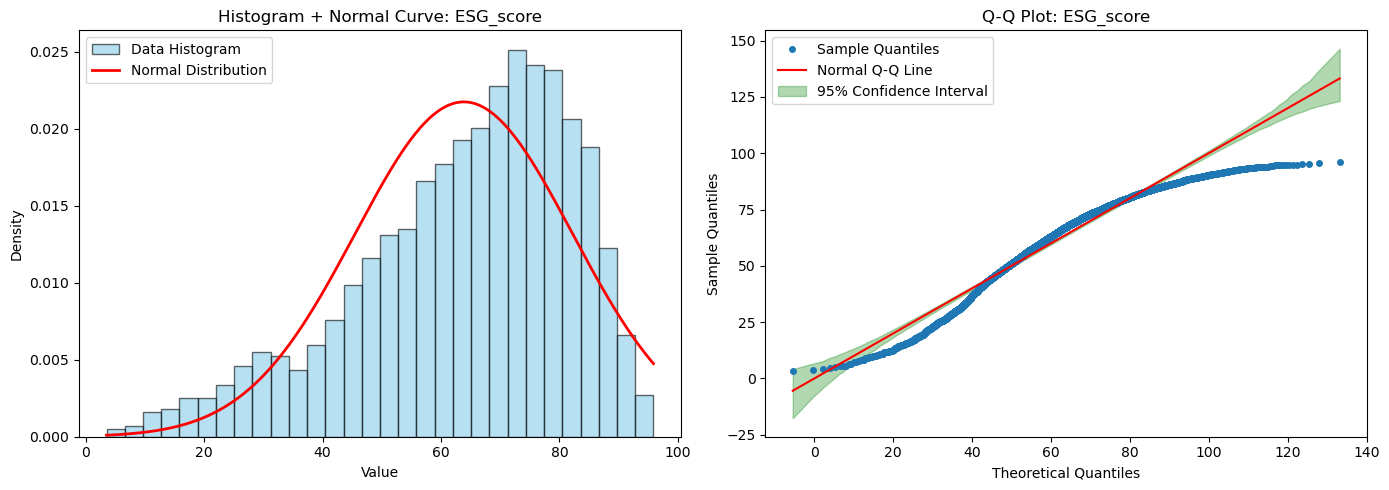

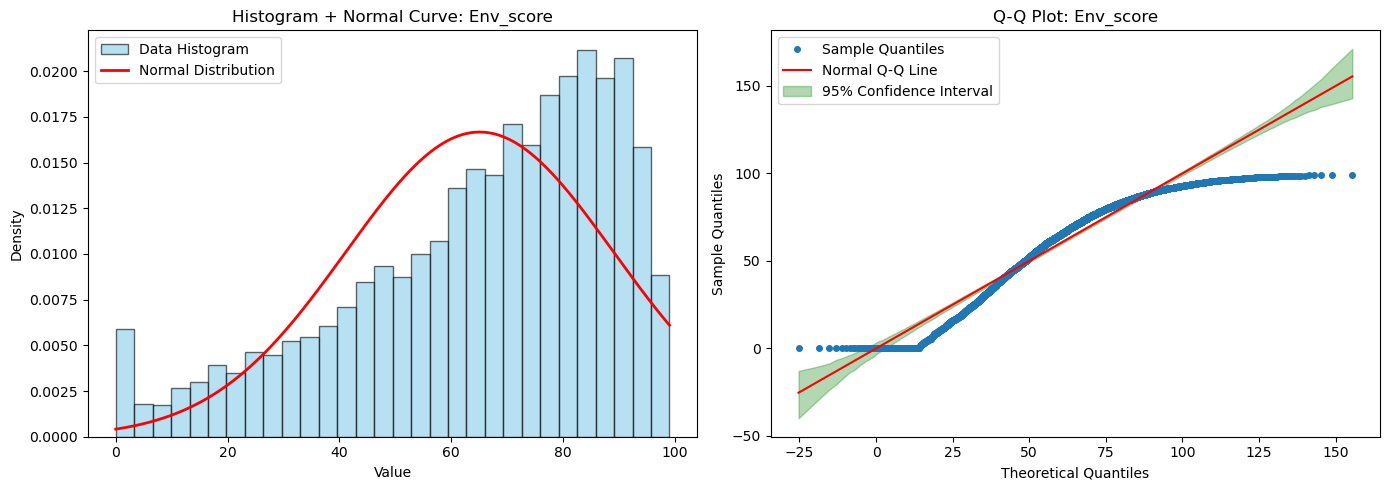

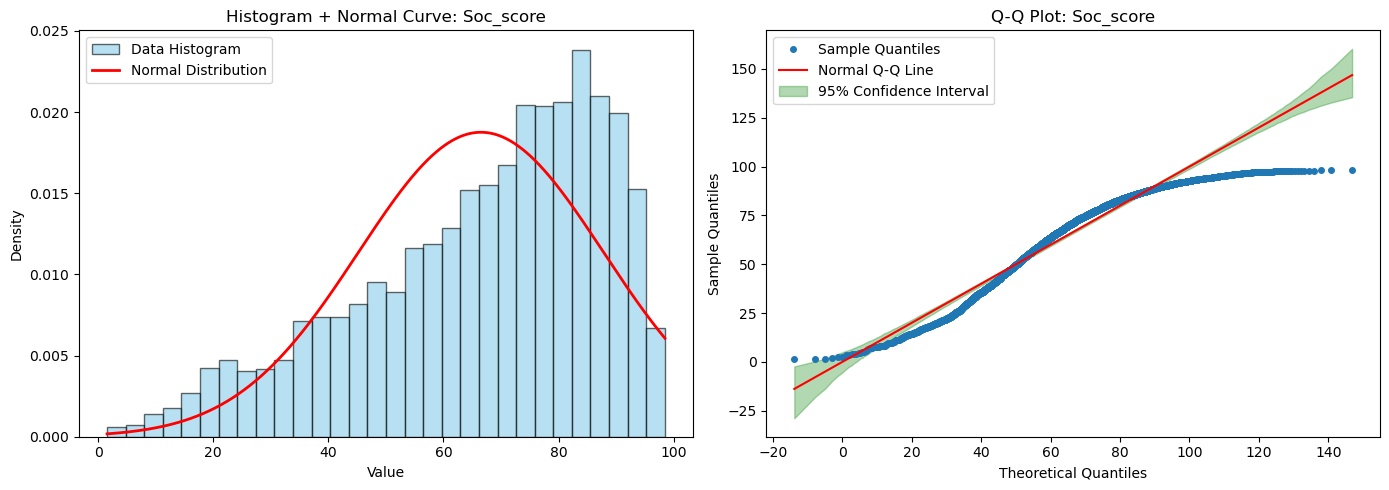

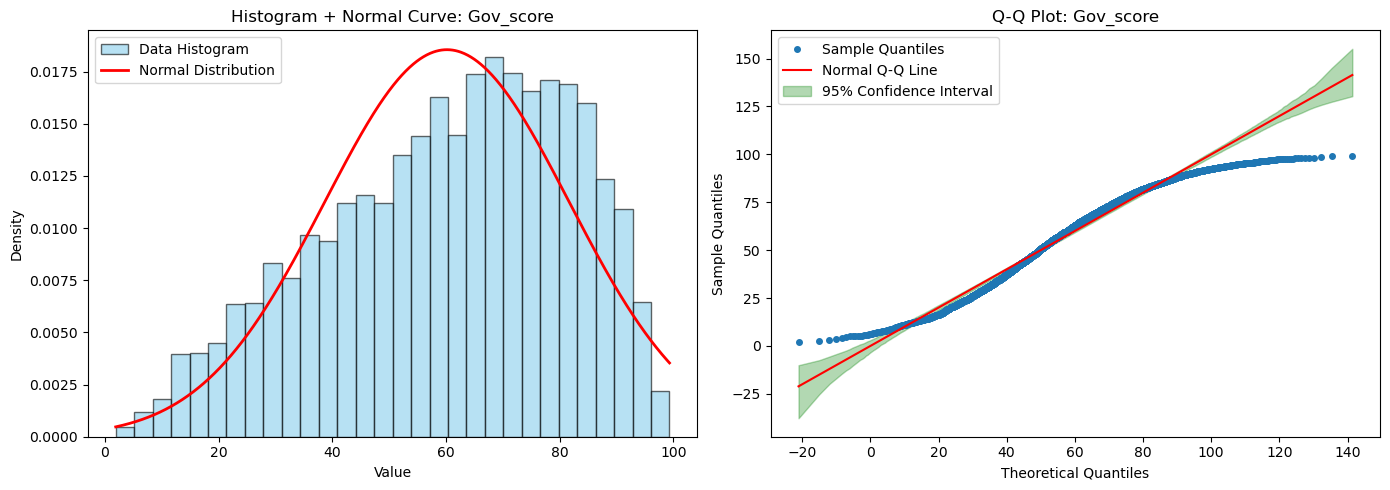

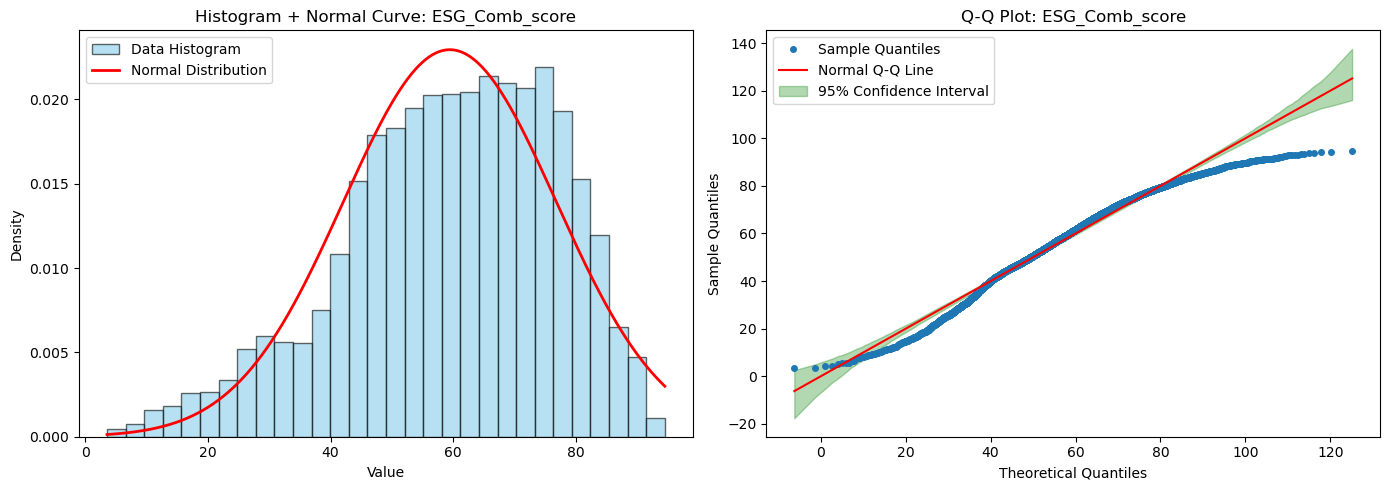

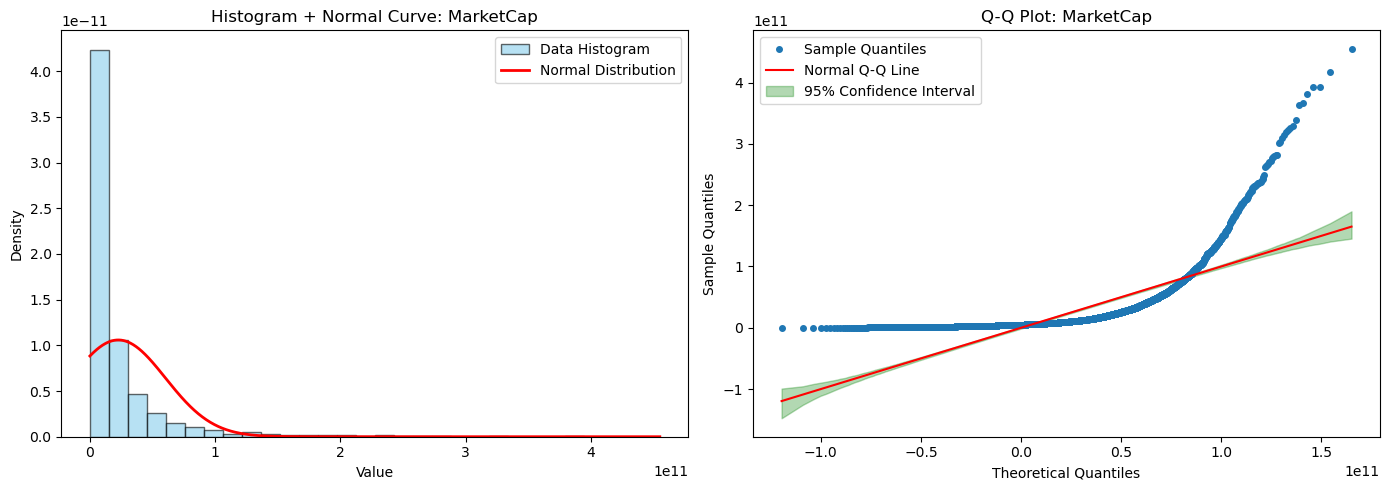

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# List of variables you want to analyze
variables = ['ROA', 'ROE', 'EPS', 'ESG_score', 'Env_score', 'Soc_score', 'Gov_score', 'ESG_Comb_score', 'MarketCap']

# Loop through each variable
for var in variables:
    data = df[var].dropna().values
    n = len(data)

    if n < 10:
        continue  # skip variables with too little data

    mean = np.mean(data)
    std = np.std(data, ddof=1)

    # === Plot Histogram with Normal Curve ===
    fig, axs = plt.subplots(1, 2, figsize=(14, 5))

    # Histogram
    axs[0].hist(data, bins=30, density=True, alpha=0.6, color='skyblue', edgecolor='black', label='Data Histogram')

    # Normal PDF
    x = np.linspace(min(data), max(data), 1000)
    normal_pdf = stats.norm.pdf(x, mean, std)
    axs[0].plot(x, normal_pdf, 'r-', lw=2, label='Normal Distribution')

    axs[0].set_title(f"Histogram + Normal Curve: {var}")
    axs[0].set_xlabel("Value")
    axs[0].set_ylabel("Density")
    axs[0].legend()

    # === Q-Q Plot with Curved 95% Confidence Interval ===
    sample_q = np.sort(data)
    probs = (np.arange(1, n + 1) - 0.5) / n
    theoretical_q = stats.norm.ppf(probs, loc=mean, scale=std)

    # Simulate confidence bands
    n_sim = 1000
    sim_qs = np.zeros((n_sim, n))
    for j in range(n_sim):
        sim_data = np.random.normal(loc=mean, scale=std, size=n)
        sim_qs[j, :] = np.sort(sim_data)

    lower_bound = np.percentile(sim_qs, 2.5, axis=0)
    upper_bound = np.percentile(sim_qs, 97.5, axis=0)

    # Q-Q Plot
    axs[1].plot(theoretical_q, sample_q, 'o', markersize=4, label='Sample Quantiles')
    axs[1].plot(theoretical_q, theoretical_q, 'r-', label='Normal Q-Q Line')
    axs[1].fill_between(theoretical_q, lower_bound, upper_bound, color='green', alpha=0.3, label='95% Confidence Interval')

    axs[1].set_title(f"Q-Q Plot: {var}")
    axs[1].set_xlabel("Theoretical Quantiles")
    axs[1].set_ylabel("Sample Quantiles")
    axs[1].legend()

    plt.tight_layout()
    plt.savefig(f"normality_check_{var}.png", dpi=300)
    plt.show()


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# List of variables you want to test
variables = ['ROA', 'ROE', 'EPS', 'ESG_score', 'Env_score', 'Soc_score', 'Gov_score', 'ESG_Comb_score', 'MarketCap']

# Create a dataframe to store Shapiro-Wilk results
shapiro_results = pd.DataFrame(columns=['Variable', 'W-statistic', 'p-value'])

# Loop through each variable
for var in variables:
    data = df[var].dropna()
    w_statistic, p_value = stats.shapiro(data)
    shapiro_results = pd.concat([shapiro_results, pd.DataFrame({'Variable': [var],
                                                                'W-statistic': [w_statistic],
                                                                'p-value': [p_value]})],
                                ignore_index=True)

# Display results
print(shapiro_results)

# Optional: highlight which variables are significantly non-normal (e.g., p-value < 0.05)
print("\nVariables where normality is rejected at 5% significance level:")
print(shapiro_results[shapiro_results['p-value'] < 0.05]['Variable'].tolist())


         Variable  W-statistic       p-value
0             ROA     0.863020  3.884111e-59
1             ROE     0.571617  2.417637e-82
2             EPS     0.119761  5.015582e-99
3       ESG_score     0.950998  1.396734e-41
4       Env_score     0.926571  4.151423e-48
5       Soc_score     0.937610  2.026134e-45
6       Gov_score     0.968529  5.304327e-35
7  ESG_Comb_score     0.975645  1.834573e-31
8       MarketCap     0.538425  5.339434e-84

Variables where normality is rejected at 5% significance level:
['ROA', 'ROE', 'EPS', 'ESG_score', 'Env_score', 'Soc_score', 'Gov_score', 'ESG_Comb_score', 'MarketCap']


C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_12964\3547205701.py:15: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6296.
  w_statistic, p_value = stats.shapiro(data)
C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_12964\3547205701.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  shapiro_results = pd.concat([shapiro_results, pd.DataFrame({'Variable': [var],


### Kolmogorov smirnov test

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# List of variables to test
variables = ['ROA', 'ROE', 'EPS', 'ESG_score', 'Env_score', 'Soc_score', 'Gov_score', 'ESG_Comb_score', 'MarketCap']

# Create a dataframe to store K-S test results
ks_results = pd.DataFrame(columns=['Variable', 'D-statistic', 'p-value'])

# Loop through each variable
for var in variables:
    data = df[var].dropna()
    # Standardize the data
    standardized_data = (data - data.mean()) / data.std()
    # Compare against standard normal distribution
    d_statistic, p_value = stats.kstest(standardized_data, 'norm')
    
    ks_results = pd.concat([ks_results, pd.DataFrame({'Variable': [var],
                                                      'D-statistic': [d_statistic],
                                                      'p-value': [p_value]})],
                           ignore_index=True)

# Display results
print(ks_results)

# Optional: highlight which variables are significantly non-normal (e.g., p-value < 0.05)
print("\nVariables where normality is rejected at 5% significance level:")
print(ks_results[ks_results['p-value'] < 0.05]['Variable'].tolist())


         Variable  D-statistic        p-value
0             ROA     0.118896   5.232676e-78
1             ROE     0.186200  1.464361e-191
2             EPS     0.407106   0.000000e+00
3       ESG_score     0.076627   1.342019e-32
4       Env_score     0.091098   6.442874e-46
5       Soc_score     0.092313   3.850227e-47
6       Gov_score     0.059104   1.467127e-19
7  ESG_Comb_score     0.047655   7.280245e-13
8       MarketCap     0.273631   0.000000e+00

Variables where normality is rejected at 5% significance level:
['ROA', 'ROE', 'EPS', 'ESG_score', 'Env_score', 'Soc_score', 'Gov_score', 'ESG_Comb_score', 'MarketCap']


C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_5884\43028766.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  ks_results = pd.concat([ks_results, pd.DataFrame({'Variable': [var],


# Not normal, thus ... test

### Since the data doesn’t follow a normal distribution, non-parametric tests may be more appropriate. These methods do not make assumptions about the underlying distribution of the data. 

### Spearman's rank correlation test

In [10]:
from scipy import stats
import pandas as pd

# Define ESG variables and financial ratios
esg_vars = ['ESG_score', 'Env_score', 'Soc_score', 'Gov_score', 'ESG_Comb_score']
financial_vars = ['EPS', 'ROA', 'ROE']

# Create a list to store results
results = []

# Loop over all combinations and compute Spearman's correlation
for esg in esg_vars:
    for fin in financial_vars:
        # Drop NA values for this pair
        df_pair = df[[esg, fin]].dropna()
        corr, p_value = stats.spearmanr(df_pair[esg], df_pair[fin])
        results.append({
            'ESG Variable': esg,
            'Financial Ratio': fin,
            'Spearman Correlation': corr,
            'P-value': p_value
        })

# Convert results to DataFrame
spearman_results = pd.DataFrame(results)

# Display results
print(spearman_results)

      ESG Variable Financial Ratio  Spearman Correlation        P-value
0        ESG_score             EPS              0.143779   1.958470e-30
1        ESG_score             ROA             -0.140840   2.935355e-29
2        ESG_score             ROE             -0.116224   2.211191e-20
3        Env_score             EPS              0.134013   1.267335e-26
4        Env_score             ROA             -0.290265  1.758711e-122
5        Env_score             ROE             -0.208938   4.730631e-63
6        Soc_score             EPS              0.123166   1.036500e-22
7        Soc_score             ROA             -0.040959   1.151298e-03
8        Soc_score             ROE             -0.044025   4.754181e-04
9        Gov_score             EPS              0.091329   3.859057e-13
10       Gov_score             ROA             -0.133009   3.014749e-26
11       Gov_score             ROE             -0.076696   1.105405e-09
12  ESG_Comb_score             EPS              0.131456   1.136

In [12]:
import pandas as pd
from scipy.stats import spearmanr

# Load your data into a DataFrame (assuming it's already named df)
# If loading from CSV: df = pd.read_csv("your_file.csv")

# Define ESG and financial ratio columns
esg_vars = ['ESG_score', 'Env_score', 'Soc_score', 'Gov_score', 'ESG_Comb_score']
financial_vars = ['EPS', 'ROA', 'ROE']

# Prepare results container
results = []

# Compute Spearman's correlation between each ESG and financial variable
for esg in esg_vars:
    for fin in financial_vars:
        # Drop missing values for pairwise correlation
        subset = df[[esg, fin]].dropna()
        rho, pval = spearmanr(subset[esg], subset[fin])
        results.append({
            'ESG Variable': esg,
            'Financial Ratio': fin,
            'Spearman Correlation': rho,
            'p-value': pval
        })

# Convert results to DataFrame for easy viewing
results_df = pd.DataFrame(results)

# Display results sorted by absolute correlation
results_df = results_df.sort_values(by='Spearman Correlation', key=abs, ascending=False)

print(results_df)


      ESG Variable Financial Ratio  Spearman Correlation        p-value
4        Env_score             ROA             -0.290265  1.758711e-122
5        Env_score             ROE             -0.208938   4.730631e-63
0        ESG_score             EPS              0.143779   1.958470e-30
1        ESG_score             ROA             -0.140840   2.935355e-29
3        Env_score             EPS              0.134013   1.267335e-26
10       Gov_score             ROA             -0.133009   3.014749e-26
12  ESG_Comb_score             EPS              0.131456   1.136314e-25
6        Soc_score             EPS              0.123166   1.036500e-22
2        ESG_score             ROE             -0.116224   2.211191e-20
9        Gov_score             EPS              0.091329   3.859057e-13
11       Gov_score             ROE             -0.076696   1.105405e-09
13  ESG_Comb_score             ROA             -0.054199   1.686208e-05
14  ESG_Comb_score             ROE             -0.048997   1.005

# Control variables

### Market Capitalization

In [5]:
df

,Company Name,Ticker Symbol,NAICS National Industry Name,Year,EPS,ROA,ROE,ESG_score,Env_score,Soc_score,Gov_score,ESG_Comb_score,MarketCap
0,Covestro AG,1COV,Plastics Material and Resin Manufacturing,2016,2.93,5.1,20.1,66.40,70.25,68.00,56.88,66.40,1.387610e+10
1,Covestro AG,1COV,Plastics Material and Resin Manufacturing,2017,4.17,7.7,20.4,68.66,68.28,74.58,59.31,68.66,2.089835e+10
2,Covestro AG,1COV,Plastics Material and Resin Manufacturing,2018,12.25,18.6,42.2,73.62,72.78,74.72,73.21,73.62,9.062689e+09
3,Covestro AG,1COV,Plastics Material and Resin Manufacturing,2019,10.74,16.3,34.2,74.58,69.59,71.77,88.15,74.58,8.503184e+09
4,Covestro AG,1COV,Plastics Material and Resin Manufacturing,2020,3.26,4.9,10.5,76.25,74.38,69.86,90.37,76.25,1.191101e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6291,Zurich Insurance Group AG,ZURN,Direct Property and Casualty Insurance Carriers,2019,24.28,0.9,13.1,89.93,90.84,91.69,86.64,79.96,6.138598e+10
6292,Zurich Insurance Group AG,ZURN,Direct Property and Casualty Insurance Carriers,2020,27.69,1.0,12.7,88.87,89.60,90.93,85.50,50.53,6.349212e+10
6293,Zurich Insurance Group AG,ZURN,Direct Property and Casualty Insurance Carriers,2021,25.56,0.9,10.5,89.19,86.31,87.95,97.03,76.17,6.604281e+10
6294,Zurich Insurance Group AG,ZURN,Direct Property and Casualty Insurance Carriers,2022,34.66,1.2,13.7,87.89,85.62,87.16,94.72,78.62,7.199106e+10


In [7]:
import pandas as pd

# Assuming your DataFrame is named df and the 'MarketCap' column is already present
bins = [0, 3e8, 2e9, 1e10, 2e11, float('inf')]
labels = ['Micro Cap', 'Small Cap', 'Mid Cap', 'Large Cap', 'Mega Cap']

df['Market Capitalization Category'] = pd.cut(df['MarketCap'], bins=bins, labels=labels, right=False)


In [9]:
df

,Company Name,Ticker Symbol,Country of Exchange,NAICS National Industry Name,Year,EPS,ROA,ROE,ESG_score,Env_score,Soc_score,Gov_score,ESG_Comb_score,MarketCap,Market Capitalization Category
0,Covestro AG,1COV,Germany,Plastics Material and Resin Manufacturing,2016,2.93,5.1,20.1,66.40,70.25,68.00,56.88,66.40,1.387610e+10,Large Cap
1,Covestro AG,1COV,Germany,Plastics Material and Resin Manufacturing,2017,4.17,7.7,20.4,68.66,68.28,74.58,59.31,68.66,2.089835e+10,Large Cap
2,Covestro AG,1COV,Germany,Plastics Material and Resin Manufacturing,2018,12.25,18.6,42.2,73.62,72.78,74.72,73.21,73.62,9.062689e+09,Mid Cap
3,Covestro AG,1COV,Germany,Plastics Material and Resin Manufacturing,2019,10.74,16.3,34.2,74.58,69.59,71.77,88.15,74.58,8.503184e+09,Mid Cap
4,Covestro AG,1COV,Germany,Plastics Material and Resin Manufacturing,2020,3.26,4.9,10.5,76.25,74.38,69.86,90.37,76.25,1.191101e+10,Large Cap
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6291,Zurich Insurance Group AG,ZURN,Switzerland,Direct Property and Casualty Insurance Carriers,2019,24.28,0.9,13.1,89.93,90.84,91.69,86.64,79.96,6.138598e+10,Large Cap
6292,Zurich Insurance Group AG,ZURN,Switzerland,Direct Property and Casualty Insurance Carriers,2020,27.69,1.0,12.7,88.87,89.60,90.93,85.50,50.53,6.349212e+10,Large Cap
6293,Zurich Insurance Group AG,ZURN,Switzerland,Direct Property and Casualty Insurance Carriers,2021,25.56,0.9,10.5,89.19,86.31,87.95,97.03,76.17,6.604281e+10,Large Cap
6294,Zurich Insurance Group AG,ZURN,Switzerland,Direct Property and Casualty Insurance Carriers,2022,34.66,1.2,13.7,87.89,85.62,87.16,94.72,78.62,7.199106e+10,Large Cap


In [11]:
#If you have more than two groups, you can use this test to compare the distributions of ESG scores across different financial performance categories 
#(like companies with different market capitalization sizes, for example). It’s a non-parametric version of ANOVA.

from scipy.stats import kruskal

# Example: Compare ESG_score across different MarketCap categories
groups = [df[df['Market Capitalization Category'] == category]['ESG_score']
          for category in df['Market Capitalization Category'].unique()]

stat, p_value = kruskal(*groups)
print(f"Kruskal-Wallis H-statistic: {stat}")
print(f"P-value: {p_value}")


Kruskal-Wallis H-statistic: 1307.9796148067971
P-value: 6.195408760446843e-282


In [13]:
from scipy.stats import kruskal

# List of ESG variables to test
esg_columns = ['ESG_score', 'Env_score', 'Soc_score', 'Gov_score', 'ESG_Comb_score']

# Iterate over each ESG variable and perform the Kruskal-Wallis test
for column in esg_columns:
    groups = [df[df['Market Capitalization Category'] == category][column]
              for category in df['Market Capitalization Category'].unique()]

    stat, p_value = kruskal(*groups)
    print(f"Kruskal-Wallis test for {column}:")
    print(f"H-statistic: {stat}")
    print(f"P-value: {p_value}\n")


Kruskal-Wallis test for ESG_score:
H-statistic: 1307.9796148067971
P-value: 6.195408760446843e-282

Kruskal-Wallis test for Env_score:
H-statistic: 1084.5199569283106
P-value: 1.7158973681620888e-233

Kruskal-Wallis test for Soc_score:
H-statistic: 1174.2167299873763
P-value: 6.187769972925365e-253

Kruskal-Wallis test for Gov_score:
H-statistic: 461.9223943893806
P-value: 1.1487932262598738e-98

Kruskal-Wallis test for ESG_Comb_score:
H-statistic: 553.426303601695
P-value: 1.8561007668702756e-118



In [15]:
from scipy.stats import kruskal

# List of ESG-related variables
esg_vars = ['ESG_score', 'Env_score', 'Soc_score', 'Gov_score', 'ESG_Comb_score']

# Loop through each ESG variable and perform the Kruskal-Wallis H test
results = []

for var in esg_vars:
    # Group the ESG variable by market cap category
    grouped_data = [group[var].dropna().values for name, group in df.groupby('Market Capitalization Category')]
    
    # Perform Kruskal-Wallis test
    stat, p_value = kruskal(*grouped_data)
    
    results.append({
        'Variable': var,
        'Test Statistic': stat,
        'p-value': p_value
    })

# Display results
import pandas as pd

results_df = pd.DataFrame(results)
print(results_df)


         Variable  Test Statistic        p-value
0       ESG_score     1307.979615  6.195409e-282
1       Env_score     1084.519957  1.715897e-233
2       Soc_score     1174.216730  6.187770e-253
3       Gov_score      461.922394   1.148793e-98
4  ESG_Comb_score      553.426304  1.856101e-118


C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_26480\2841474785.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = [group[var].dropna().values for name, group in df.groupby('Market Capitalization Category')]


Significant differences were found in the distributions of ESG_score, Soc_score, Gov_score, and ESG_Comb_score across market capitalization categories.

No significant difference was found for the Env_score across market capitalization categories.

The null hypothesis (H0) in the context of the Kruskal-Wallis test is:

H0: There is no significant difference in the distribution of the variable (e.g., ESG score, Env score, etc.) across the different groups (e.g., Market Capitalization categories).

In other words, the null hypothesis assumes that the groups being compared (in your case, the different market capitalization categories) come from the same population, meaning that any observed differences in the variable of interest (like the ESG scores) are due to random chance.

The alternative hypothesis (H1) is:

H1: There is a significant difference in the distribution of the variable across the groups.

When you conduct the Kruskal-Wallis test, you're testing whether the null hypothesis can be rejected. If the p-value is smaller than a predefined significance level (e.g., 0.05), you reject the null hypothesis and conclude that there is a significant difference between the groups.

In [17]:
# Count significant hits per ESG variable
significance_summary = significant_results.groupby(['ESG_Variable'])['Industry'].nunique().reset_index()
significance_summary.columns = ['ESG_Variable', 'Num_Significant_Industries']
print(significance_summary)

  ESG_Variable  Num_Significant_Industries
0    ESG_score                         113


#### Country of Exchange

In [5]:
from scipy.stats import kruskal

# List of ESG variables to test
esg_columns = ['ESG_score', 'Env_score', 'Soc_score', 'Gov_score', 'ESG_Comb_score']

# Iterate over each ESG variable
for column in esg_columns:
    # Group ESG variable by Country of Exchange
    groups = [df[df['Country of Exchange'] == country][column].dropna()
              for country in df['Country of Exchange'].unique()]
    
    # Skip if fewer than 2 groups with data
    if sum(len(group) > 0 for group in groups) < 2:
        print(f"Not enough data to test {column}")
        continue

    # Perform Kruskal-Wallis test
    stat, p_value = kruskal(*groups)
    
    print(f"Kruskal-Wallis test for {column} by Country of Exchange:")
    print(f"H-statistic: {stat:.4f}")
    print(f"P-value: {p_value:.4e}\n")


Kruskal-Wallis test for ESG_score by Country of Exchange:
H-statistic: 482.9812
P-value: 1.2958e-92

Kruskal-Wallis test for Env_score by Country of Exchange:
H-statistic: 545.9056
P-value: 6.5996e-106

Kruskal-Wallis test for Soc_score by Country of Exchange:
H-statistic: 580.3401
P-value: 3.3686e-113

Kruskal-Wallis test for Gov_score by Country of Exchange:
H-statistic: 184.2954
P-value: 1.1578e-30

Kruskal-Wallis test for ESG_Comb_score by Country of Exchange:
H-statistic: 436.0402
P-value: 9.9136e-83



In [11]:
import pandas as pd
from scipy.stats import kruskal

# Assuming your DataFrame is named df

# Define ESG variables to test
esg_variables = ['ESG_score', 'Env_score', 'Soc_score', 'Gov_score', 'ESG_Comb_score']

# Store results
results = {}

# Loop through each ESG variable
for var in esg_variables:
    # Group data by country
    groups = [group[var].dropna().values for name, group in df.groupby('Country of Exchange')]
    
    # Apply Kruskal-Wallis H-test
    stat, p_value = kruskal(*groups)
    
    # Store the result
    results[var] = {'H-statistic': stat, 'p-value': p_value}

# Display results
for var, res in results.items():
    print(f"{var}:\n  H-statistic = {res['H-statistic']:.4f}, p-value = {res['p-value']:.4e}")
    if res['p-value'] < 0.05:
        print("  → Statistically significant difference across countries.\n")
    else:
        print("  → No statistically significant difference across countries.\n")


ESG_score:
  H-statistic = 482.9812, p-value = 1.2958e-92
  → Statistically significant difference across countries.

Env_score:
  H-statistic = 545.9056, p-value = 6.5996e-106
  → Statistically significant difference across countries.

Soc_score:
  H-statistic = 580.3401, p-value = 3.3686e-113
  → Statistically significant difference across countries.

Gov_score:
  H-statistic = 184.2954, p-value = 1.1578e-30
  → Statistically significant difference across countries.

ESG_Comb_score:
  H-statistic = 436.0402, p-value = 9.9136e-83
  → Statistically significant difference across countries.



#### Industry

In [19]:
unique_industries = df['NAICS National Industry Name'].unique()
print(f"Number of unique industries: {len(unique_industries)}")
print("Industries:")
for industry in unique_industries:
    print(f"- {industry}")


Number of unique industries: 194
Industries:
- Plastics Material and Resin Manufacturing
- Other Electric Power Generation
- Commercial Banking
- Fats and Oils Refining and Blending
- Iron Ore Mining
- Power, Distribution, and Specialty Transformer Manufacturing
- Portfolio Management and Investment Advice
- Breweries
- Hotels (except Casino Hotels) and Motels
- Supermarkets and Other Grocery Retailers (except Convenience Retailers)
- Industrial Machinery and Equipment Merchant Wholesalers
- Temporary Help Services
- Other Airport Operations
- Footwear Manufacturing
- Electromedical and Electrotherapeutic Apparatus Manufacturing
- Insurance Agencies and Brokerages
- Construction, Mining, and Forestry Machinery and Equipment Rental and Leasing
- Industrial Gas Manufacturing
- Other Basic Inorganic Chemical Manufacturing
- Crude Petroleum Extraction
- Paint and Coating Manufacturing
- Commercial and Service Industry Machinery Manufacturing
- All Other Miscellaneous Retailers
- Air-Condit

In [21]:
# Count observations per industry
industry_counts = df['NAICS National Industry Name'].value_counts()

# Filter to industries with >= 20 observations
valid_industries = industry_counts[industry_counts >= 20].index
df_filtered = df[df['NAICS National Industry Name'].isin(valid_industries)]

print(f"Filtered dataset contains {len(valid_industries)} industries and {len(df_filtered)} rows.")


Filtered dataset contains 89 industries and 4926 rows.


In [23]:
import pandas as pd
from scipy.stats import kruskal

# Define ESG variables
esg_variables = ['ESG_score', 'Env_score', 'Soc_score', 'Gov_score', 'ESG_Comb_score']

# Store results
industry_results = {}

# Loop over each ESG variable and apply Kruskal-Wallis test across industries
for var in esg_variables:
    # Group by industry
    groups = [group[var].dropna().values for name, group in df_filtered.groupby('NAICS National Industry Name')]
    
    # Apply the Kruskal-Wallis test
    stat, p_value = kruskal(*groups)
    
    # Store results
    industry_results[var] = {'H-statistic': stat, 'p-value': p_value}

# Display results
for var, res in industry_results.items():
    print(f"{var}:\n  H-statistic = {res['H-statistic']:.4f}, p-value = {res['p-value']:.4e}")
    if res['p-value'] < 0.05:
        print("  → Statistically significant difference across industries.\n")
    else:
        print("  → No statistically significant difference across industries.\n")

ESG_score:
  H-statistic = 1367.2263, p-value = 1.7966e-228
  → Statistically significant difference across industries.

Env_score:
  H-statistic = 1809.7533, p-value = 0.0000e+00
  → Statistically significant difference across industries.

Soc_score:
  H-statistic = 1298.2005, p-value = 1.8938e-214
  → Statistically significant difference across industries.

Gov_score:
  H-statistic = 949.6497, p-value = 1.3712e-144
  → Statistically significant difference across industries.

ESG_Comb_score:
  H-statistic = 895.2260, p-value = 7.1707e-134
  → Statistically significant difference across industries.



In [17]:
import pandas as pd
from scipy.stats import kruskal

# Define ESG variables
esg_variables = ['ESG_score', 'Env_score', 'Soc_score', 'Gov_score', 'ESG_Comb_score']

# Store results
industry_results = {}

# Loop over each ESG variable and apply Kruskal-Wallis test across industries
for var in esg_variables:
    # Group by industry
    groups = [group[var].dropna().values for name, group in df.groupby('NAICS National Industry Name')]
    
    # Apply the Kruskal-Wallis test
    stat, p_value = kruskal(*groups)
    
    # Store results
    industry_results[var] = {'H-statistic': stat, 'p-value': p_value}

# Display results
for var, res in industry_results.items():
    print(f"{var}:\n  H-statistic = {res['H-statistic']:.4f}, p-value = {res['p-value']:.4e}")
    if res['p-value'] < 0.05:
        print("  → Statistically significant difference across industries.\n")
    else:
        print("  → No statistically significant difference across industries.\n")


ESG_score:
  H-statistic = 2273.0807, p-value = 0.0000e+00
  → Statistically significant difference across industries.

Env_score:
  H-statistic = 2752.9470, p-value = 0.0000e+00
  → Statistically significant difference across industries.

Soc_score:
  H-statistic = 2137.5259, p-value = 0.0000e+00
  → Statistically significant difference across industries.

Gov_score:
  H-statistic = 1655.7409, p-value = 1.4939e-230
  → Statistically significant difference across industries.

ESG_Comb_score:
  H-statistic = 1636.7958, p-value = 6.4798e-227
  → Statistically significant difference across industries.



In [14]:
from scipy.stats import kruskal

# List of ESG variables to test
esg_columns = ['ESG_score', 'Env_score', 'Soc_score', 'Gov_score', 'ESG_Comb_score']

# Iterate over each ESG variable
for column in esg_columns:
    # Group ESG variable by Industry
    groups = [df[df['NAICS National Industry Name'] == industry][column].dropna()
              for industry in df['NAICS National Industry Name'].unique()]
    
    # Skip if fewer than 2 groups with data
    if sum(len(group) > 0 for group in groups) < 2:
        print(f"Not enough data to test {column}")
        continue

    # Perform Kruskal-Wallis test
    stat, p_value = kruskal(*groups)
    
    print(f"Kruskal-Wallis test for {column} by NAICS National Industry Name:")
    print(f"H-statistic: {stat:.4f}")
    print(f"P-value: {p_value:.4e}\n")


Kruskal-Wallis test for ESG_score by NAICS National Industry Name:
H-statistic: 2273.0807
P-value: 0.0000e+00

Kruskal-Wallis test for Env_score by NAICS National Industry Name:
H-statistic: 2752.9470
P-value: 0.0000e+00

Kruskal-Wallis test for Soc_score by NAICS National Industry Name:
H-statistic: 2137.5259
P-value: 0.0000e+00

Kruskal-Wallis test for Gov_score by NAICS National Industry Name:
H-statistic: 1655.7409
P-value: 1.4939e-230

Kruskal-Wallis test for ESG_Comb_score by NAICS National Industry Name:
H-statistic: 1636.7958
P-value: 6.4798e-227

